# Sysu Card

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
# 负号显示
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data["OCCTIME"] = pd.to_datetime(data["OCCTIME"], infer_datetime_format=True) 
data["EFFECTDATE"] = pd.to_datetime(data["EFFECTDATE"], infer_datetime_format=True) 

In [5]:
data.head()

,RO,OCCTIME,EFFECTDATE,MERCNAME,TRANAMT,TRANNAME,TRANCODE,CARDBAL,JDESC,JNUM,MACCOUNT,F1,F2,F3,SYSCODE,POSCODE,CMONEY,ZMONEY
0,1,2021-01-25 12:26:07,2021-01-25 12:27:07,学五饭堂一楼小卖部,-9.2,持卡人消费,15,106.75,NaN,2984466561,1000011.0,1,11,2,473,18,106.75,106.75
1,2,2021-01-23 12:05:58,2021-01-23 12:06:34,南校园东区松涛园食堂,-16.0,持卡人消费,15,115.95,NaN,2987726049,1000088.0,1,11,2,463,45,115.95,115.95
2,3,2021-01-23 07:43:09,2021-01-23 07:43:33,学五饭堂一楼小卖部,-8.0,持卡人消费,15,131.95,NaN,2984463093,1000011.0,1,11,2,473,18,131.95,131.95
3,4,2021-01-20 12:43:18,2021-01-20 12:43:45,学五清真饭堂,-14.6,持卡人消费,15,139.95,NaN,2984457456,1000020.0,1,11,2,473,94,139.95,139.95
4,5,2021-01-19 12:17:00,2021-01-19 12:17:08,学五清真饭堂,-8.6,持卡人消费,15,154.55,NaN,2984454340,1000020.0,1,11,2,473,94,154.55,154.55


In [6]:
data.tail()

,RO,OCCTIME,EFFECTDATE,MERCNAME,TRANAMT,TRANNAME,TRANCODE,CARDBAL,JDESC,JNUM,MACCOUNT,F1,F2,F3,SYSCODE,POSCODE,CMONEY,ZMONEY
464,465,2019-08-31 17:30:11,2019-08-31 17:19:11,学五饭堂一楼小卖部,-10.9,持卡人消费,15,275.2,NaN,2984396627,1000011.0,1,11,2,473,15,275.2,275.2
465,466,2019-08-31 12:39:28,2019-08-31 12:28:47,学五饭堂一楼小卖部,-13.9,持卡人消费,15,286.1,NaN,2984394792,1000011.0,1,11,2,473,53,286.1,286.1
466,467,2019-08-31 12:32:43,2019-08-31 12:21:23,NaN,300.0,补助流水,22,300.0,NaN,4488725,NaN,0,0,0,142,6,300.0,300.0
467,468,2019-08-31 10:23:31,2019-08-31 10:12:10,NaN,300.0,银行转帐,16,0.0,2019083110232241470251597,2778920,NaN,0,0,1,439,1,0.0,0.0
468,469,2019-08-07 17:19:23,2019-08-07 17:09:07,NaN,0.0,持卡人开户,01,0.0,NaN,789,NaN,0,1,1,90,0,0.0,0.0


## 最常去的地方:-)

学五真的不好吃,但是它太近了Orz

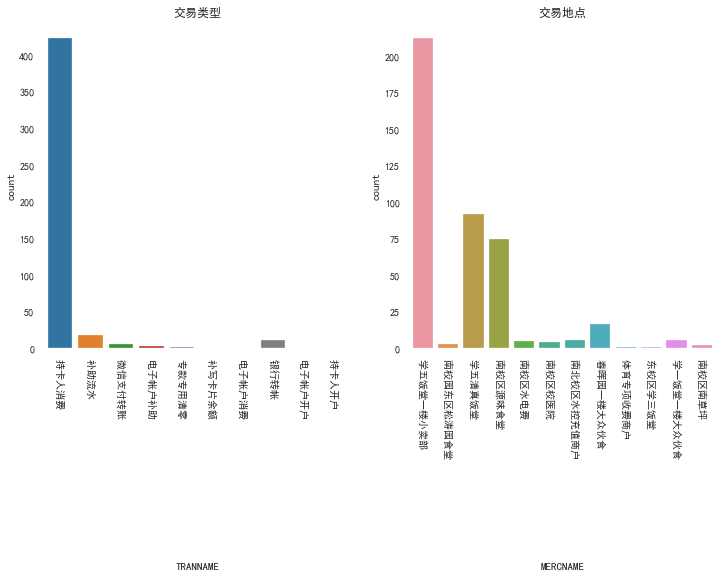

In [42]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.countplot(x='TRANNAME', data=data)
plt.xticks(rotation=-90)
plt.title("交易类型")


plt.subplot(122)
sns.countplot(x='MERCNAME', data=data)
plt.xticks(rotation=-90)
plt.title("交易地点")

plt.savefig("pics/交易类型与地点.jpg", dpi=300)

## 每餐10~15块的样子

In [13]:
spends = data[(data['TRANAMT'] <= 50) & (data['TRANAMT'] >= -50)]

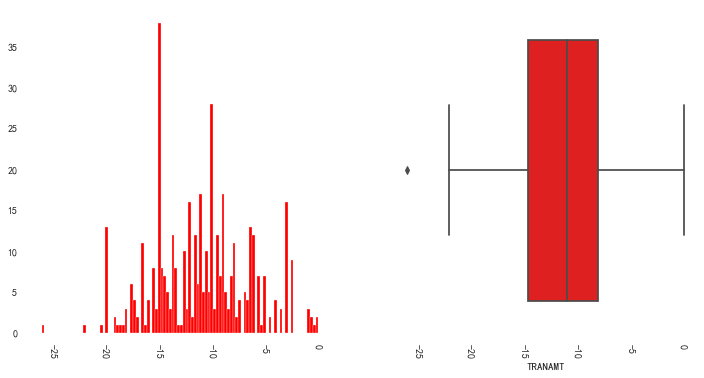

In [43]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.hist(x='TRANAMT', data=spends, bins=100, color = 'red')
plt.xticks(rotation=-90)

plt.subplot(122)
sns.boxplot(x='TRANAMT', data=spends, color='red')
plt.xticks(rotation=-90)
plt.savefig("pics/每餐金额.jpg", dpi=300)

## 当我们谈论吃饭时我们在谈论什么:-)

这空白的半年就很魔幻233

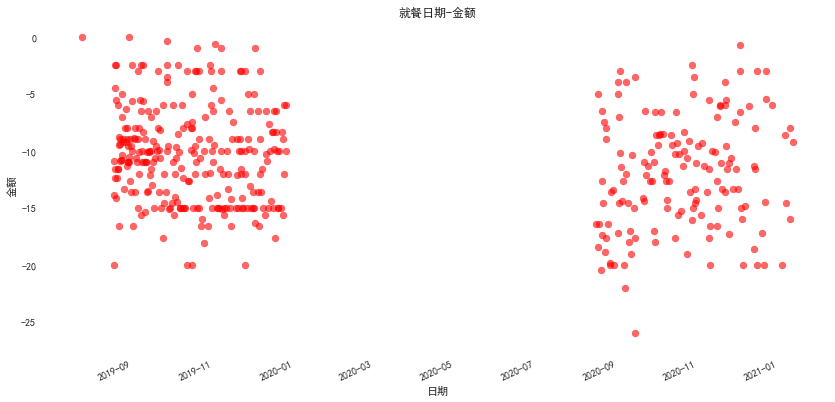

In [44]:
plt.figure(figsize=(14, 6))
plt.scatter(x = "OCCTIME", y = "TRANAMT", data = spends, color='red', alpha=0.6) 
plt.xticks(rotation = 25)
plt.ylabel("金额")
plt.xlabel("日期")
plt.title("就餐日期-金额")
plt.savefig("pics/就餐日期-金额.jpg", dpi=300)

感觉就餐时间还算规律?除了早餐比较少之外:-)

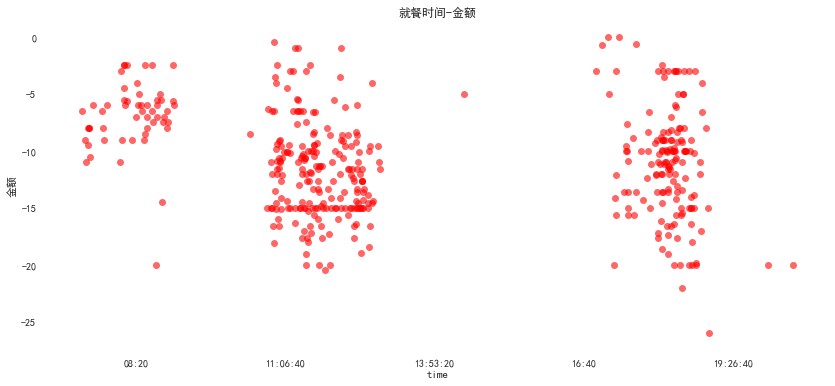

In [45]:
spends['TIME'] = spends['OCCTIME'].dt.time
plt.figure(figsize=(14, 6))
plt.plot_date(x = "TIME", y = "TRANAMT", data = spends, color='red', alpha=0.6) 
plt.ylabel("金额")
plt.title("就餐时间-金额")
plt.savefig("pics/就餐时间-金额.jpg", dpi=300)

## Profile

In [9]:
profile = ProfileReport(data, title='Pandas Profiling Report')

In [10]:
profile.to_widgets()